<a href="https://colab.research.google.com/github/FarrelAD/Tim-Maju-Lancar-Datathon-Jatim-2025/blob/dev%2Fcakra/notebooks/FINAL_ANALISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # Ensure pandas is imported
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files # Import the files module

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving jatim-excel.xlsx to jatim-excel (1).xlsx
User uploaded file "jatim-excel (1).xlsx" with length 157583 bytes


In [ ]:
df = pd.read_excel(list(uploaded.keys())[0])
display(df.head(100))

,kabupaten/kota,kecamatan,sekolah,rombel,sekolah_id,npsn,bentuk_pendidikan,status_sekolah,akreditasi,guru_kelas,...,before_tempat_bermain_olahraga,after_tempat_bermain_olahraga,before_ruang_tu,after_ruang_tu,before_ruang_konseling,after_ruang_konseling,before_ruang_osis,after_ruang_osis,before_bangunan,after_bangunan
0,Kab. Bangkalan,Kec. Bangkalan,SLB SAMUDRA LAVENDER,13,58B659F8-2673-4B66-ADC9-0995AFA0E80E,69830686,SLB,Swasta,B,13,...,0,0,0,0,0,0,0,0,2,2
1,Kab. Bangkalan,Kec. Kamal,SLB PGRI,11,4028497E-8D18-E111-8F7E-F5091768A769,20531143,SLB,Swasta,B,6,...,0,0,0,0,0,0,0,0,3,3
2,Kab. Bangkalan,Kec. Socah,SLB NEGERI KELEYAN BANGKALAN,33,60CF4B7E-8D18-E111-A61E-3BDB8AFFE3B0,20531387,SLB,Negeri,B,21,...,0,0,1,1,0,0,0,0,6,6
3,Kab. Bangkalan,Kec. Tragah,SLB SAMUDRA TERRA ATHENA,6,C28A7F37-6226-475E-B414-42822EFD4E03,70027553,SLB,Swasta,B,6,...,1,1,0,0,0,0,0,0,5,5
4,Kab. Banyuwangi,Kec. Bangorejo,SLB PGRI BANGOREJO,13,F709E309-7266-4D2D-9BB0-F11BAB758EDE,69861080,SLB,Swasta,C,9,...,0,0,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kab. Jombang,Kec. Gudo,SLB SUNAR AJI,12,9B749798-150E-4C7C-8B7F-51AB139ED6AC,69984103,SLB,Swasta,C,3,...,0,0,0,0,0,0,0,0,8,8
96,Kab. Jombang,Kec. Jogoroto,SLB DARUL ULUM,12,6076DCF5-8B18-E111-8B56-1F9EFE82BDE6,20503606,SLB,Swasta,A,7,...,1,1,0,0,0,0,0,0,1,1
97,Kab. Jombang,Kec. Jombang,SLB MUHAMMADIYAH,26,NaN,20503224,SLB,Negeri,NaN,10,...,0,0,2,2,1,1,0,0,17,17
98,Kab. Jombang,Kec. Jombang,SLB NEGERI JOMBANG,24,F034FBF2-8B18-E111-8FFD-8B630529F9BF,20503224,SLB,Negeri,B,12,...,0,0,1,1,0,0,0,0,8,8


## Compare Quantity Swasta vs Negeri


=== Jumlah dan Proporsi Sekolah Negeri vs Swasta ===


,Count,Proportion (%)
status_sekolah,,
Swasta,297,75.77%
Negeri,95,24.23%


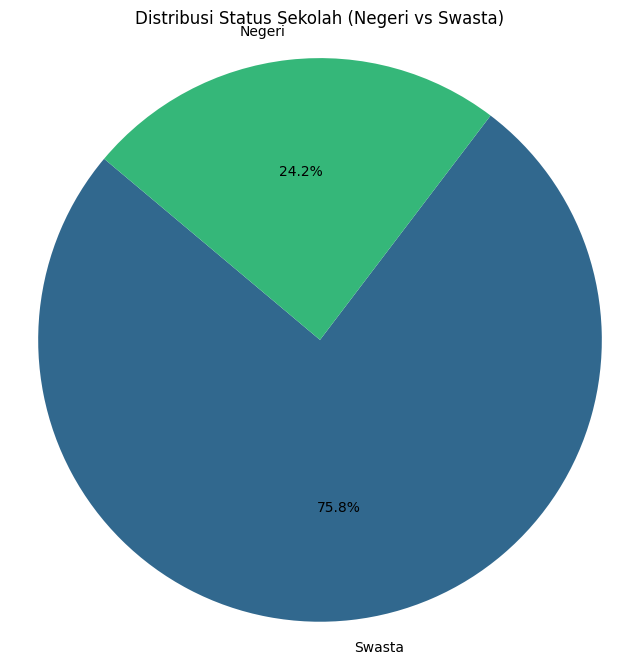

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for better aesthetics

print("\n=== Jumlah dan Proporsi Sekolah Negeri vs Swasta ===")
status_counts = df['status_sekolah'].value_counts()
status_proportions = df['status_sekolah'].value_counts(normalize=True) * 100

status_summary = pd.DataFrame({
    'Count': status_counts,
    'Proportion (%)': status_proportions.map('{:.2f}%'.format)
})
display(status_summary)

# --- Visualisasi ---
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(status_counts)))
plt.title('Distribusi Status Sekolah (Negeri vs Swasta)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Jumlah Sekolah Per Status Akreditasi


=== Jumlah Sekolah per Status dan Akreditasi ===


akreditasi,A,B,Belum Akreditasi,C,Tidak Terakreditasi
status_sekolah,,,,,
Negeri,34,52,1,4,0
Swasta,28,196,7,58,1


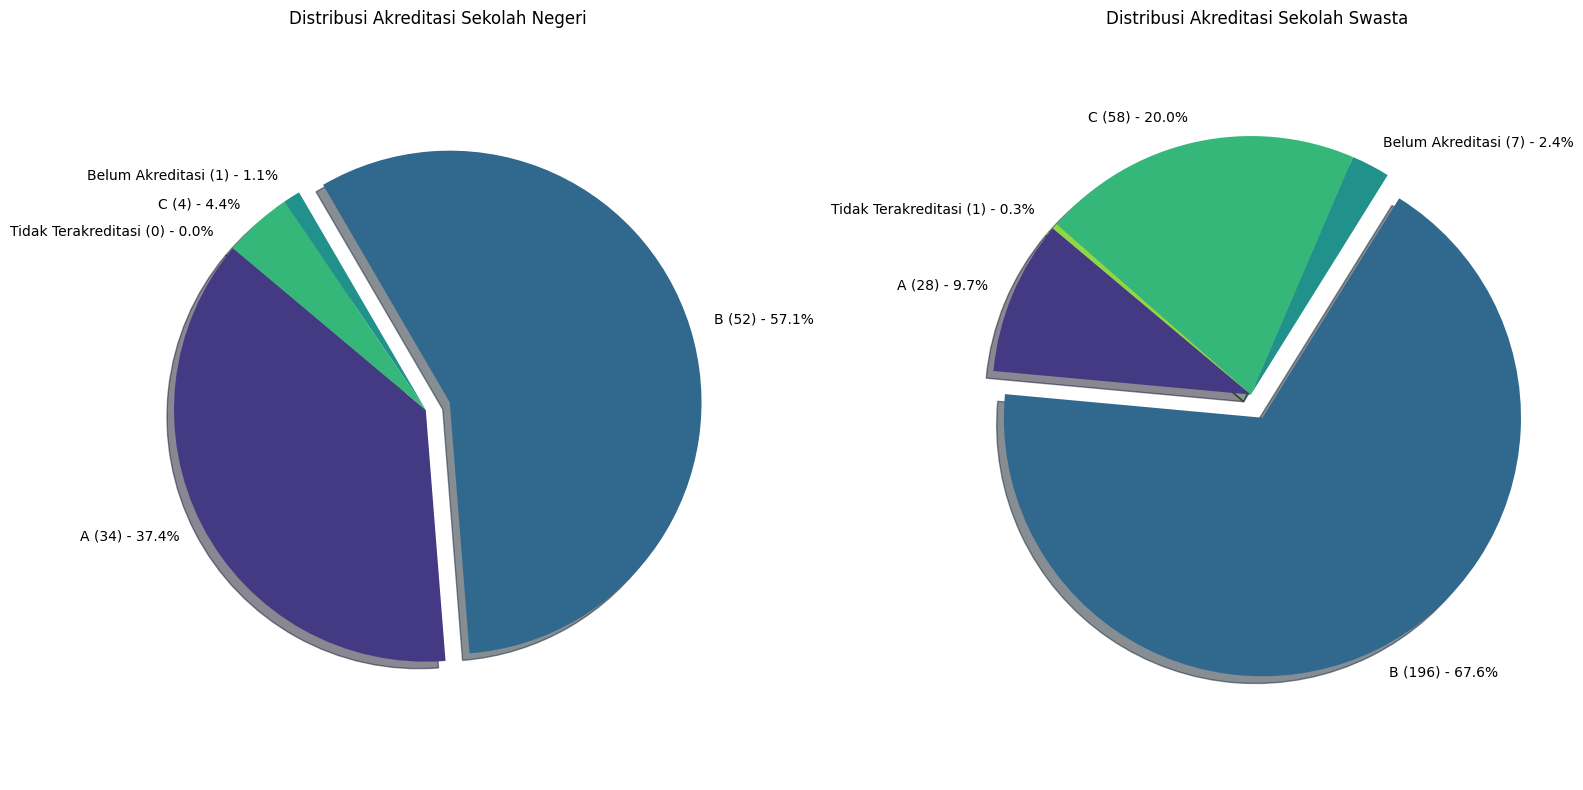

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count schools by status and accreditation
accreditation_counts = df.groupby(['status_sekolah', 'akreditasi']).size().unstack(fill_value=0)

print("\n=== Jumlah Sekolah per Status dan Akreditasi ===")
display(accreditation_counts)

# Visualize the comparison using pie charts side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Create a figure with 1 row and 2 columns of subplots

# Pie chart for Negeri schools
if 'Negeri' in accreditation_counts.index:
    negeri_counts = accreditation_counts.loc['Negeri']
    total_negeri = negeri_counts.sum()
    # Create custom labels with accreditation, count, and percentage
    negeri_labels = [f'{level} ({count}) - {count/total_negeri:.1%}' for level, count in negeri_counts.items()]

    # Add shadow and potentially explode a slice for visual appeal
    # Find the index of the largest slice to explode
    max_negeri_slice_index = negeri_counts.argmax()
    explode_negeri = [0] * len(negeri_counts)
    explode_negeri[max_negeri_slice_index] = 0.1 # Explode the largest slice

    axes[0].pie(negeri_counts, labels=negeri_labels, startangle=140, colors=sns.color_palette('viridis', len(negeri_counts)),
               pctdistance=0.85, labeldistance=1.1, shadow=True, explode=explode_negeri) # Add shadow and explode
    axes[0].set_title('Distribusi Akreditasi Sekolah Negeri')
    axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
else:
    axes[0].text(0.5, 0.5, "Tidak ada data untuk sekolah Negeri.", horizontalalignment='center', verticalalignment='center')
    axes[0].set_title('Distribusi Akreditasi Sekolah Negeri')
    axes[0].axis('off') # Turn off axis for empty plot

# Pie chart for Swasta schools
if 'Swasta' in accreditation_counts.index:
    swasta_counts = accreditation_counts.loc['Swasta']
    total_swasta = swasta_counts.sum()
    # Create custom labels with accreditation, count, and percentage
    swasta_labels = [f'{level} ({count}) - {count/total_swasta:.1%}' for level, count in swasta_counts.items()]

    # Add shadow and potentially explode a slice for visual appeal
    # Find the index of the largest slice to explode
    max_swasta_slice_index = swasta_counts.argmax()
    explode_swasta = [0] * len(swasta_counts)
    explode_swasta[max_swasta_slice_index] = 0.1 # Explode the largest slice

    axes[1].pie(swasta_counts, labels=swasta_labels, startangle=140, colors=sns.color_palette('viridis', len(swasta_counts)),
               pctdistance=0.85, labeldistance=1.1, shadow=True, explode=explode_swasta) # Add shadow and explode
    axes[1].set_title('Distribusi Akreditasi Sekolah Swasta')
    axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
else:
    axes[1].text(0.5, 0.5, "Tidak ada data untuk sekolah Swasta.", horizontalalignment='center', verticalalignment='center')
    axes[1].set_title('Distribusi Akreditasi Sekolah Swasta')
    axes[1].axis('off') # Turn off axis for empty plot


plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()

## Data Understanding & Preprocessing

In [ ]:
# 1. Cek missing values for schools
missing_values = df.isnull().sum()
print("=== Missing Values Per Column  Schools) ===")
print(missing_values.to_string())
print("\n=== Missing Values di Kolom 'akreditasi'  Schools) ===")
print(missing_values['akreditasi'])

=== Missing Values Per Column  Schools) ===
kabupaten/kota                     0
kecamatan                          0
sekolah                            0
rombel                             0
sekolah_id                        11
npsn                               0
bentuk_pendidikan                  0
status_sekolah                     0
akreditasi                        11
guru_kelas                         0
guru_matematika                    0
guru_bahasa_indonesia              0
guru_bahasa_inggris                0
guru_sejarah_indonesia             0
guru_pkn                           0
guru_penjaskes                     0
guru_agama_budi_pekerti            0
guru_seni_budaya                   0
ptk_laki                           0
ptk_perempuan                      0
pegawai_laki                       0
pegawai_perempuan                  0
pd_kelas_1_laki                    0
pd_kelas_1_perempuan               0
pd_kelas_2_laki                    0
pd_kelas_2_perempuan           

## Perhitungan rasio guru dan siswa 1:8

In [ ]:
import numpy as np
import pandas as pd # Ensure pandas is imported


# 3. Rasio guru per siswa

# Calculate teacher-student ratio as students per teacher (pd / ptk)
df['teacher_student_ratio'] = df['pd'] / df['ptk']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
# Replace infinite values with NaN
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (using the recommended approach)
df['teacher_student_ratio'] = df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean())

# Define the target teacher-student ratio (students per teacher)
target_ratio = 8 # For 1:8 ratio, target is 8 students per teacher

# Create a new column to indicate the ratio's performance relative to the target
def evaluate_teacher_student_ratio(ratio, target):
    if pd.isna(ratio):
        return 'N/A'
    elif ratio < target:
        return f'Better than 1:{target} ({ratio:.2f})' # Fewer students per teacher is better
    elif ratio == target:
        return f'Meets 1:{target}'
    else:
        return f'Worse than 1:{target} ({ratio:.2f})' # More students per teacher is worse

df['Teacher_Student_Ratio_Evaluation'] = df['teacher_student_ratio'].apply(lambda x: evaluate_teacher_student_ratio(x, target_ratio))


# Group by sekolah and select the calculated ratio, then sort
teacher_student_ratio_sekolah_sorted = df.groupby('sekolah')[['ptk', 'pd', 'teacher_student_ratio', 'Teacher_Student_Ratio_Evaluation']].first().reset_index() # Using first() as no aggregation is requested
teacher_student_ratio_sekolah_sorted = teacher_student_ratio_sekolah_sorted.sort_values(by='teacher_student_ratio', ascending=False)

# Format the teacher_student_ratio as "1:X" where X is the calculated ratio
# Handle cases where ratio might be NaN after filling
teacher_student_ratio_sekolah_sorted['Teacher_Student_Ratio_Formatted'] = teacher_student_ratio_sekolah_sorted['teacher_student_ratio'].apply(lambda x: f'1:{x:.2f}' if pd.notna(x) else 'N/A')

# Display the table including the formatted ratio and evaluation
print("semakin tinggi nilai ratio, semakin jelek rationya, harusnya 1:8")

display(teacher_student_ratio_sekolah_sorted[['sekolah', 'ptk', 'pd', 'Teacher_Student_Ratio_Formatted', 'Teacher_Student_Ratio_Evaluation']])

semakin tinggi nilai ratio, semakin jelek rationya, harusnya 1:8


,sekolah,ptk,pd,Teacher_Student_Ratio_Formatted,Teacher_Student_Ratio_Evaluation
237,SLB PGRI AMONG PUTRA,3,88,1:29.33,Worse than 1:8 (29.33)
135,SLB HARAPAN PELANGI,2,51,1:25.50,Worse than 1:8 (25.50)
32,SLB AC JATI WIYATA DHARMA TUBAN,5,126,1:25.20,Worse than 1:8 (25.20)
360,SMALB PGRI GENTENG,1,22,1:22.00,Worse than 1:8 (22.00)
43,SLB AL FIRMA`UNAH,2,43,1:21.50,Worse than 1:8 (21.50)
...,...,...,...,...,...
357,SMALB BCG SUMBER DHARMA,2,0,1:0.00,Better than 1:8 (0.00)
285,SLB SINAR HARAPAN 1,20,0,1:0.00,Better than 1:8 (0.00)
106,SLB C DHARMA WANITA LEBO,5,0,1:0.00,Better than 1:8 (0.00)
64,SLB Amaryllis,7,0,1:0.00,Better than 1:8 (0.00)


## Perbandingan Rata-rata Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Negeri vs Swasta)


=== Perbandingan Rata-rata Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Negeri vs Swasta) ===


/tmp/ipython-input-2789157112.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


,status_sekolah,classroom_sufficiency,teacher_student_ratio
0,Negeri,0.956579,0.229015
1,Swasta,1.728956,0.174129


/tmp/ipython-input-2789157112.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_sekolah', y='classroom_sufficiency', data=comparison_summary, ax=axes[0], palette='viridis')
/tmp/ipython-input-2789157112.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_sekolah', y='teacher_student_ratio', data=comparison_summary, ax=axes[1], palette='viridis')


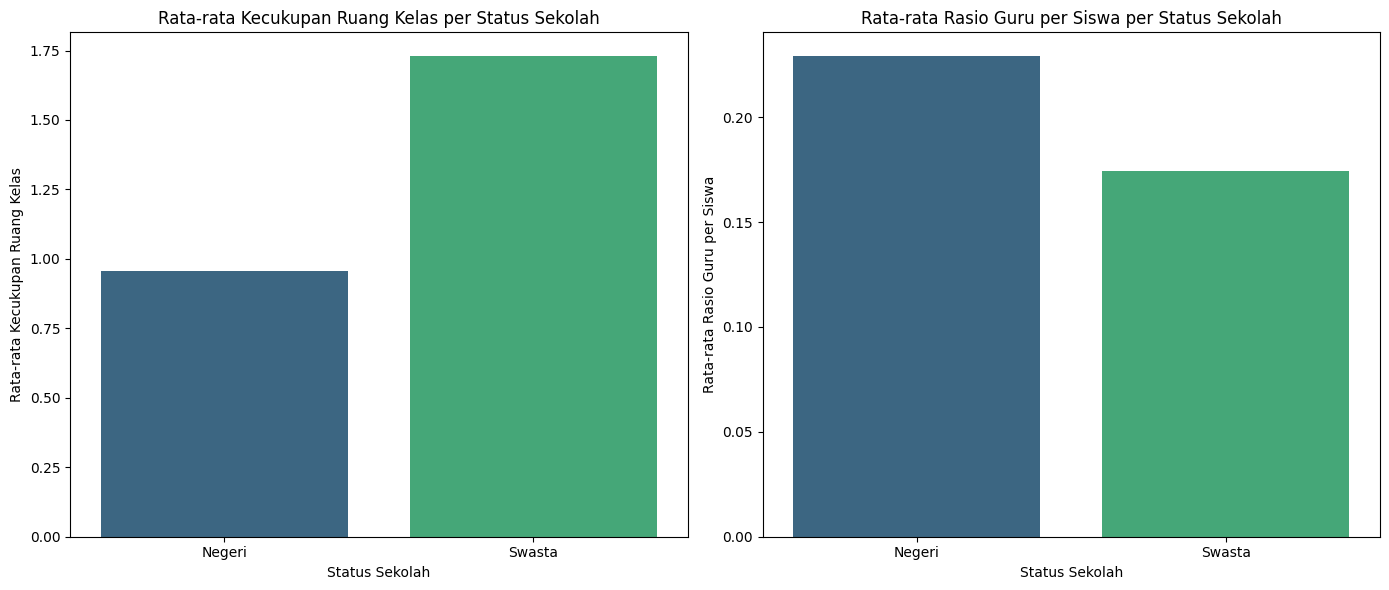


Detail perbandingan rata-rata dalam bentuk tabel:


,status_sekolah,classroom_sufficiency,teacher_student_ratio
0,Negeri,0.956579,0.229015
1,Swasta,1.728956,0.174129


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate classroom sufficiency for all schools
df['required_classrooms'] = df['pd'] / 8
df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Calculate the actual teacher-student ratio for all schools
df['teacher_student_ratio'] = df['ptk'] / df['pd']

# Handle potential NaN or infinite values in ratios
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# For simplicity, fill NaN values with the mean of the column (or another appropriate strategy)
df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean(), inplace=True)


# Group by status_sekolah and calculate the mean of the metrics
comparison_summary = df.groupby('status_sekolah')[['classroom_sufficiency', 'teacher_student_ratio']].mean().reset_index()

print("\n=== Perbandingan Rata-rata Kecukupan Ruang Kelas dan Rasio Guru per Siswa (Negeri vs Swasta) ===")
display(comparison_summary) # Ensure the summary table is displayed

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Classroom Sufficiency
sns.barplot(x='status_sekolah', y='classroom_sufficiency', data=comparison_summary, ax=axes[0], palette='viridis')
axes[0].set_title('Rata-rata Kecukupan Ruang Kelas per Status Sekolah')
axes[0].set_xlabel('Status Sekolah')
axes[0].set_ylabel('Rata-rata Kecukupan Ruang Kelas')

# Bar plot for Teacher-Student Ratio
sns.barplot(x='status_sekolah', y='teacher_student_ratio', data=comparison_summary, ax=axes[1], palette='viridis')
axes[1].set_title('Rata-rata Rasio Guru per Siswa per Status Sekolah')
axes[1].set_xlabel('Status Sekolah')
axes[1].set_ylabel('Rata-rata Rasio Guru per Siswa')

plt.tight_layout()
plt.show()

# Adding an explicit print statement after the plot to re-emphasize the table.
print("\nDetail perbandingan rata-rata dalam bentuk tabel:")
display(comparison_summary)

## Distrubusi rasio guru negeri vs swasta


=== Distribusi Sekolah berdasarkan Evaluasi Rasio Guru per Siswa (terhadap 1:8) ===

--- Sekolah Negeri ---


,Evaluation Category,Count
0,Better than 1:8,75
1,Worse than 1:8,19
2,Meets 1:8,1


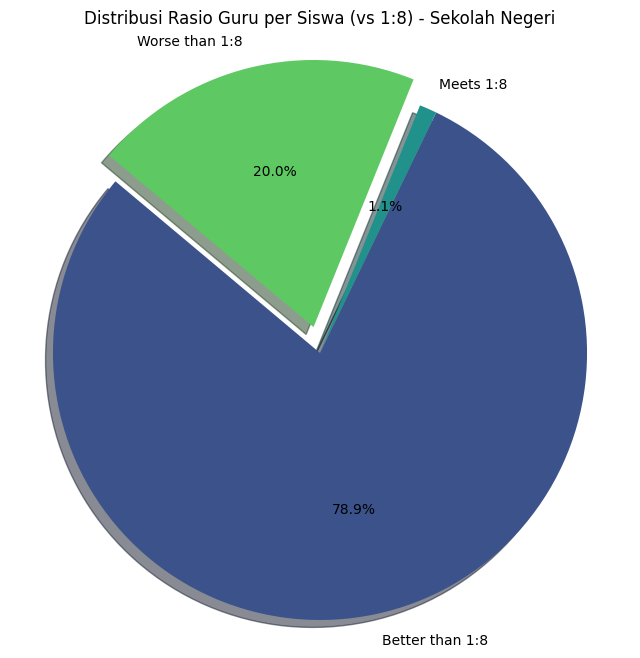


--- Sekolah Swasta ---


,Evaluation Category,Count
0,Better than 1:8,195
1,Worse than 1:8,93
2,Meets 1:8,9


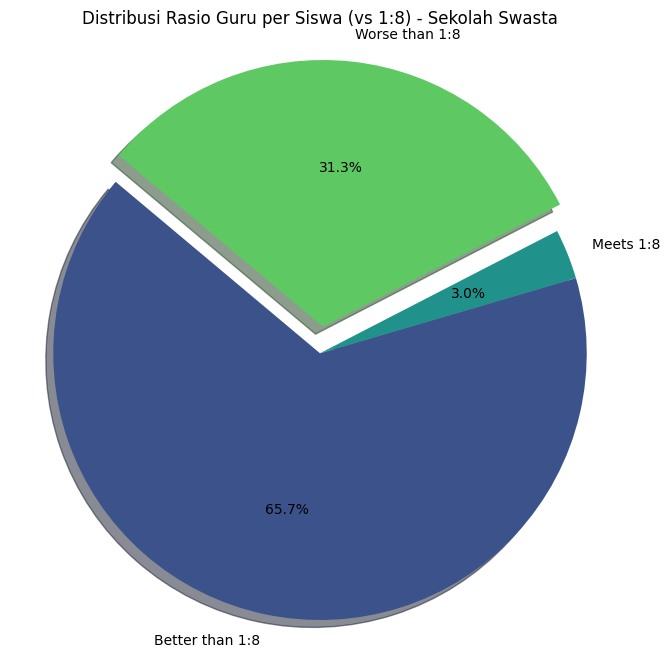

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Extract the main evaluation category (e.g., "Better than 1:8")
df['Teacher_Student_Ratio_Category'] = df['Teacher_Student_Ratio_Evaluation'].apply(
    lambda x: x.split('(')[0].strip() if '(' in x else x
)

print("\n=== Distribusi Sekolah berdasarkan Evaluasi Rasio Guru per Siswa (terhadap 1:8) ===")

# --- Analisis dan Visualisasi untuk Sekolah Negeri ---
print("\n--- Sekolah Negeri ---")
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
if not df_negeri.empty:
    ratio_evaluation_counts_negeri = df_negeri['Teacher_Student_Ratio_Category'].value_counts().reset_index()
    ratio_evaluation_counts_negeri.columns = ['Evaluation Category', 'Count']
    display(ratio_evaluation_counts_negeri)

    category_order = ['Better than 1:8', 'Meets 1:8', 'Worse than 1:8', 'N/A']
    ratio_evaluation_counts_negeri['Evaluation Category'] = pd.Categorical(ratio_evaluation_counts_negeri['Evaluation Category'], categories=category_order, ordered=True)
    ratio_evaluation_counts_negeri = ratio_evaluation_counts_negeri.sort_values('Evaluation Category')

    plt.figure(figsize=(8, 8)) # Increased figure size
    plt.pie(ratio_evaluation_counts_negeri['Count'],
            labels=ratio_evaluation_counts_negeri['Evaluation Category'],
            autopct='%1.1f%%', # Show percentages
            startangle=140,
            colors=sns.color_palette('viridis', len(ratio_evaluation_counts_negeri)),
            shadow=True, # Add shadow
            explode=[0.1 if cat == 'Worse than 1:8' else 0 for cat in ratio_evaluation_counts_negeri['Evaluation Category']] # Explode 'Worse than' slice
           )
    plt.title('Distribusi Rasio Guru per Siswa (vs 1:8) - Sekolah Negeri')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Tidak ada data untuk sekolah Negeri.")


# --- Analisis dan Visualisasi untuk Sekolah Swasta ---
print("\n--- Sekolah Swasta ---")
df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
if not df_swasta.empty:
    ratio_evaluation_counts_swasta = df_swasta['Teacher_Student_Ratio_Category'].value_counts().reset_index()
    ratio_evaluation_counts_swasta.columns = ['Evaluation Category', 'Count']
    display(ratio_evaluation_counts_swasta)

    category_order = ['Better than 1:8', 'Meets 1:8', 'Worse than 1:8', 'N/A']
    ratio_evaluation_counts_swasta['Evaluation Category'] = pd.Categorical(ratio_evaluation_counts_swasta['Evaluation Category'], categories=category_order, ordered=True)
    ratio_evaluation_counts_swasta = ratio_evaluation_counts_swasta.sort_values('Evaluation Category')

    plt.figure(figsize=(8, 8)) # Increased figure size
    plt.pie(ratio_evaluation_counts_swasta['Count'],
            labels=ratio_evaluation_counts_swasta['Evaluation Category'],
            autopct='%1.1f%%', # Show percentages
            startangle=140,
            colors=sns.color_palette('viridis', len(ratio_evaluation_counts_swasta)),
            shadow=True, # Add shadow
            explode=[0.1 if cat == 'Worse than 1:8' else 0 for cat in ratio_evaluation_counts_swasta['Evaluation Category']] # Explode 'Worse than' slice
           )
    plt.title('Distribusi Rasio Guru per Siswa (vs 1:8) - Sekolah Swasta')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Tidak ada data untuk sekolah Swasta.")

## Perhitungan Fasilitas Dasar


=== Ketersediaan Fasilitas Wajib per Sekolah (sample) ===


,sekolah,status_sekolah,available_required_facilities_count,percentage_required_facilities
0,SLB SAMUDRA LAVENDER,Swasta,0,0.000000
1,SLB PGRI,Swasta,5,55.555556
2,SLB NEGERI KELEYAN BANGKALAN,Negeri,5,55.555556
3,SLB SAMUDRA TERRA ATHENA,Swasta,3,33.333333
4,SLB PGRI BANGOREJO,Swasta,5,55.555556



=== Distribusi Persentase Ketersediaan Fasilitas Wajib (Sekolah Negeri vs Swasta) ===


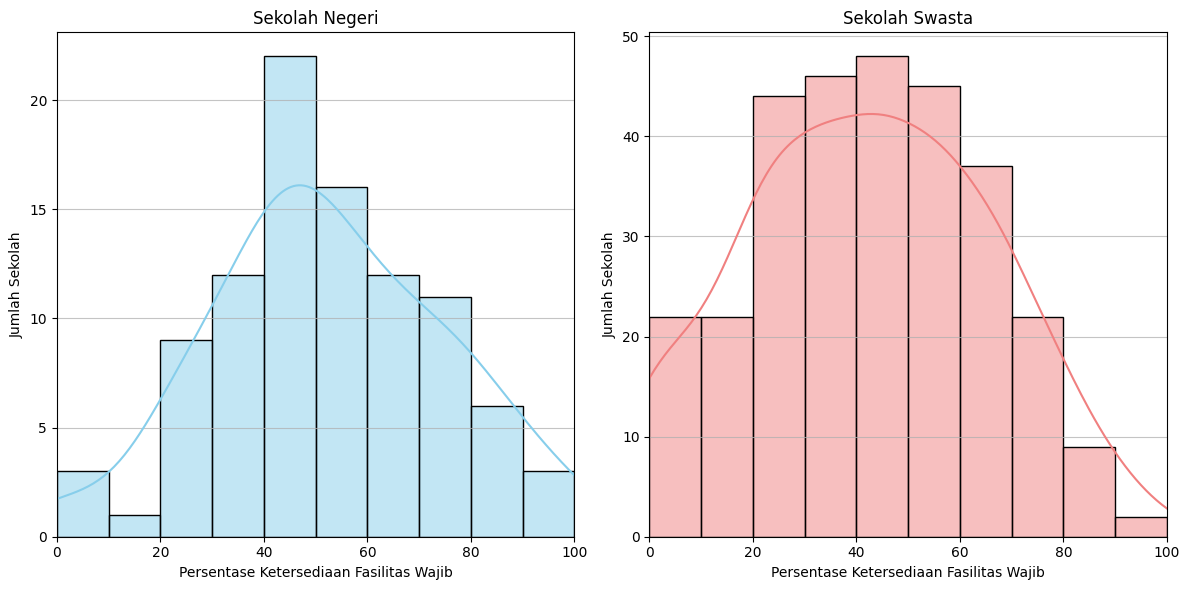


=== Ringkasan Statistik Ketersediaan Fasilitas Wajib per Status Sekolah ===


,count,mean,std,min,25%,50%,75%,max
status_sekolah,,,,,,,,
Negeri,95.0,52.280702,22.682797,0.0,33.333333,55.555556,66.666667,100.0
Swasta,297.0,42.312009,23.694303,0.0,22.222222,44.444444,55.555556,100.0



=== Sekolah dengan 100% Ketersediaan Fasilitas Wajib ===
Jumlah sekolah dengan 100% fasilitas wajib: 5


,sekolah,status_sekolah
12,SLB PGRI 3 CLURING,Negeri
176,SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG,Negeri
254,SLB NEGERI GEDANGAN,Negeri
339,SLB BHAKTI LUHUR,Swasta
376,SLB C AKW KUMARA I SURABAYA,Swasta



=== Sekolah dengan 0% Ketersediaan Fasilitas Wajib ===
Jumlah sekolah dengan 0% fasilitas wajib: 25


,sekolah,status_sekolah
0,SLB SAMUDRA LAVENDER,Swasta
9,SMPLB PGRI BANYUWANGI,Swasta
20,SLB PGRI GENTENG,Swasta
21,SMALB PGRI GENTENG,Swasta
22,SMPLB PGRI GENTENG,Swasta
25,TKLB BHAKTI PERTIWI,Swasta
62,SLB NEGERI TAMBAHREJO BOJONEGORO,Negeri
79,SLB AL-IKHLAS GRESIK,Swasta
84,SLB ABC BALUNG,Swasta
115,SLB BUDI MULYA KANDAT,Negeri


In [ ]:
# Define the required facilities based on the regulation
required_facilities = [
    # 'after_ruang_kelas',  # a. ruang kelas - removed as requested
    'after_ruang_perpus', # b. ruang perpustakaan
    'after_ruang_lab',    # c. ruang laboratorium
    'after_ruang_praktik', # This might be considered part of 'ruang laboratorium' or a separate practical room
    'after_ruang_pimpinan', # d. ruang administrasi (ruang pimpinan and ruang tu)
    'after_ruang_tu',      # d. ruang administrasi (ruang pimpinan and ruang tu)
    'after_ruang_uks',    # e. ruang kesehatan (UKS)
    'after_ruang_ibadah', # f. tempat beribadah
    'after_tempat_bermain_olahraga', # g. tempat bermain atau berolahraga
    # 'kantin' - not available in the dataset
    'after_toilet'        # i. toilet
]

# Check if required facilities columns exist in the DataFrame
existing_required_facilities = [col for col in required_facilities if col in df.columns]
missing_required_facilities = [col for col in required_facilities if col not in df.columns]

if missing_required_facilities:
    print(f"Warning: Beberapa kolom fasilitas yang diwajibkan peraturan tidak ditemukan di DataFrame: {missing_required_facilities}. Analisis akan dilakukan hanya pada kolom yang tersedia.")

# Calculate the number of required facilities available for each school
df['available_required_facilities_count'] = df[existing_required_facilities].gt(0).sum(axis=1)

# Calculate the percentage of required facilities available
# Ensure the denominator is not zero if no existing_required_facilities are found
if len(existing_required_facilities) > 0:
    df['percentage_required_facilities'] = (df['available_required_facilities_count'] / len(existing_required_facilities)) * 100
else:
    df['percentage_required_facilities'] = 0

print("\n=== Ketersediaan Fasilitas Wajib per Sekolah (sample) ===")
display(df[['sekolah', 'status_sekolah', 'available_required_facilities_count', 'percentage_required_facilities']].head())

# --- Visualisasi per Status Sekolah ---

print("\n=== Distribusi Persentase Ketersediaan Fasilitas Wajib (Sekolah Negeri vs Swasta) ===")

plt.figure(figsize=(12, 6))

# Visualisasi untuk Sekolah Negeri
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df[df['status_sekolah'] == 'Negeri']['percentage_required_facilities'], kde=True, bins=10, color='skyblue')
plt.title('Sekolah Negeri')
plt.xlabel('Persentase Ketersediaan Fasilitas Wajib')
plt.ylabel('Jumlah Sekolah')
plt.xlim(0, 100)
plt.grid(axis='y', alpha=0.75)

# Visualisasi untuk Sekolah Swasta
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df[df['status_sekolah'] == 'Swasta']['percentage_required_facilities'], kde=True, bins=10, color='lightcoral')
plt.title('Sekolah Swasta')
plt.xlabel('Persentase Ketersediaan Fasilitas Wajib')
plt.ylabel('Jumlah Sekolah')
plt.xlim(0, 100)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# --- Ringkasan Statistik per Status Sekolah ---
print("\n=== Ringkasan Statistik Ketersediaan Fasilitas Wajib per Status Sekolah ===")
facility_summary_by_status = df.groupby('status_sekolah')['percentage_required_facilities'].describe()
display(facility_summary_by_status)

# --- Sekolah dengan 100% Fasilitas Wajib ---
print("\n=== Sekolah dengan 100% Ketersediaan Fasilitas Wajib ===")
schools_with_100_facilities = df[df['percentage_required_facilities'] == 100]
print(f"Jumlah sekolah dengan 100% fasilitas wajib: {len(schools_with_100_facilities)}")
if not schools_with_100_facilities.empty:
    display(schools_with_100_facilities[['sekolah', 'status_sekolah']])

# --- Sekolah dengan 0% Fasilitas Wajib ---
print("\n=== Sekolah dengan 0% Ketersediaan Fasilitas Wajib ===")
schools_with_0_facilities = df[df['percentage_required_facilities'] == 0]
print(f"Jumlah sekolah dengan 0% fasilitas wajib: {len(schools_with_0_facilities)}")
if not schools_with_0_facilities.empty:
    display(schools_with_0_facilities[['sekolah', 'status_sekolah']])

## Rata-Rata Kecukupan Ruang Kelas Negeri Vs Swasta

In [ ]:
# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Filter for Negeri schools and calculate the average classroom sufficiency
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
average_sufficiency_negeri = df_negeri['classroom_sufficiency'].mean()

# Filter for Swasta schools and calculate the average classroom sufficiency
df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
average_sufficiency_swasta = df_swasta['classroom_sufficiency'].mean()

print("\n=== Rata-rata Kecukupan Ruang Kelas ===")
print(f"Sekolah Negeri: {average_sufficiency_negeri:.2f}")
print(f"Sekolah Swasta: {average_sufficiency_swasta:.2f}")

# Optional: Display in a small table format
print("\n=== Rata-rata Kecukupan Ruang Kelas per Status Sekolah ===")
average_sufficiency_summary = pd.DataFrame({
    'Status Sekolah': ['Negeri', 'Swasta'],
    'Rata-rata Kecukupan Ruang Kelas': [average_sufficiency_negeri, average_sufficiency_swasta]
})
display(average_sufficiency_summary)


=== Rata-rata Kecukupan Ruang Kelas ===
Sekolah Negeri: 0.96
Sekolah Swasta: 1.73

=== Rata-rata Kecukupan Ruang Kelas per Status Sekolah ===


,Status Sekolah,Rata-rata Kecukupan Ruang Kelas
0,Negeri,0.956579
1,Swasta,1.728956


Rata-Rata Kekurangan Ruang Kelas

In [ ]:
import pandas as pd
import numpy as np

# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Filter for Negeri schools with a deficit and calculate the average deficit
df_negeri_deficit = df[(df['status_sekolah'] == 'Negeri') & (df['classroom_sufficiency'] < 0)].copy()
average_deficit_negeri = df_negeri_deficit['classroom_sufficiency'].mean()

# Filter for Swasta schools with a deficit and calculate the average deficit
df_swasta_deficit = df[(df['status_sekolah'] == 'Swasta') & (df['classroom_sufficiency'] < 0)].copy()
average_deficit_swasta = df_swasta_deficit['classroom_sufficiency'].mean()


print("\n=== Rata-rata Kekurangan Ruang Kelas (Defisit) ===")
print(f"Sekolah Negeri: {average_deficit_negeri:.2f} (rata-rata kekurangan)")
print(f"Sekolah Swasta: {average_deficit_swasta:.2f} (rata-rata kekurangan)")

# Optional: Display in a small table format
print("\n=== Rata-rata Kekurangan Ruang Kelas (Defisit) per Status Sekolah ===")
average_deficit_summary = pd.DataFrame({
    'Status Sekolah': ['Negeri', 'Swasta'],
    'Rata-rata Kekurangan Ruang Kelas (Defisit)': [average_deficit_negeri, average_deficit_swasta]
})
display(average_deficit_summary)


=== Rata-rata Kekurangan Ruang Kelas (Defisit) ===
Sekolah Negeri: -3.55 (rata-rata kekurangan)
Sekolah Swasta: -3.17 (rata-rata kekurangan)

=== Rata-rata Kekurangan Ruang Kelas (Defisit) per Status Sekolah ===


,Status Sekolah,Rata-rata Kekurangan Ruang Kelas (Defisit)
0,Negeri,-3.554688
1,Swasta,-3.169811


## Visualisasi Kecukupan Ruang Kelas Negeri VS Swasta


=== Ringkasan Kecukupan Ruang Kelas per Status Sekolah ===


classroom_sufficiency_category,Defisit,Pas,Surplus
status_sekolah,,,
Negeri,48,1,46
Swasta,106,8,183


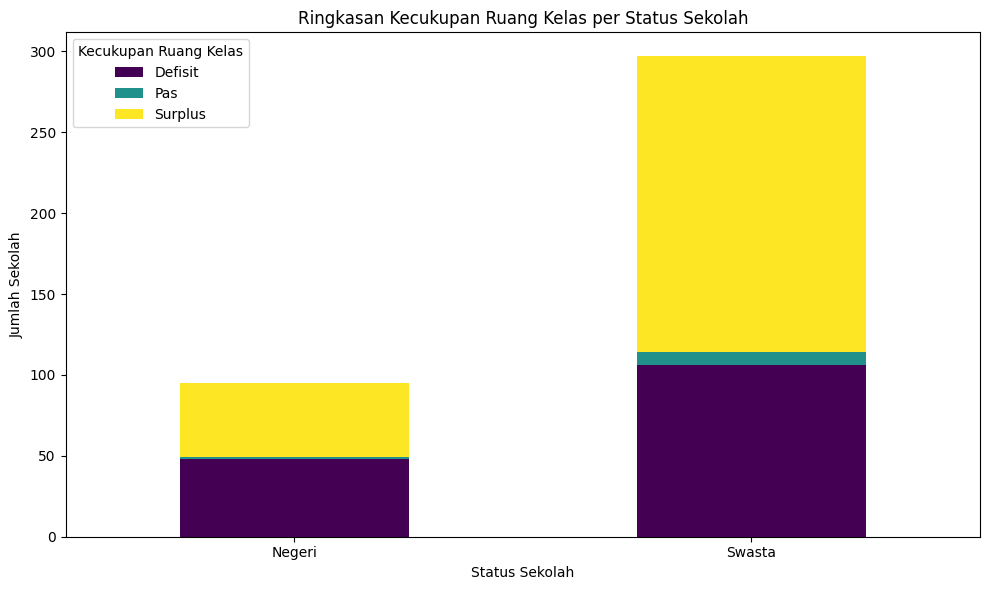

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate classroom sufficiency for all schools
df['required_classrooms'] = df['pd'] / 8
df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Create a new column to categorize classroom sufficiency
def categorize_sufficiency(sufficiency):
    if sufficiency > 0:
        return 'Surplus'
    elif sufficiency < 0:
        return 'Defisit'
    else:
        return 'Pas'

df['classroom_sufficiency_category'] = df['classroom_sufficiency'].apply(categorize_sufficiency)

# Group by status_sekolah and the new sufficiency category, then count
sufficiency_summary = df.groupby(['status_sekolah', 'classroom_sufficiency_category']).size().unstack(fill_value=0)

print("\n=== Ringkasan Kecukupan Ruang Kelas per Status Sekolah ===")
display(sufficiency_summary)

# Visualize the summary using a stacked bar chart
sufficiency_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ringkasan Kecukupan Ruang Kelas per Status Sekolah')
plt.xlabel('Status Sekolah')
plt.ylabel('Jumlah Sekolah')
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
plt.legend(title='Kecukupan Ruang Kelas')
plt.tight_layout()
plt.show()

## Skor Fasilitas dengan Persentase Negeri VS Swasta

In [ ]:
# Define the columns for the 8 facilities to check (using 'after' counts)
# Based on the previous check, 'after_kantin' is not available, so we'll use the 8 available ones.
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
missing_cols_check = [col for col in facility_cols_to_check if col not in df.columns]
if missing_cols_check:
    print(f"Error: Some facility columns are missing from the DataFrame: {missing_cols_check}")
else:
    # Calculate the number of present facilities for each school
    facility_presence_mask = df[facility_cols_to_check] > 0
    df['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Calculate the percentage score
    total_facilities_checked = len(facility_cols_to_check)
    df['facility_percentage_score'] = (df['present_facilities_count'] / total_facilities_checked) * 100

    print("\n=== Skor Fasilitas Persentase per Status Sekolah ===")
    print(f"Skor dihitung berdasarkan {total_facilities_checked} jenis fasilitas: {', '.join(facility_cols_to_check)}")

    # Filter data for Negeri status only
    df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
    print("\n--- Sekolah Negeri ---")
    if not df_negeri.empty:
        # Display school name and the new percentage score for all Negeri schools
        display(df_negeri[['sekolah', 'present_facilities_count', 'facility_percentage_score']])

        # Optional: Display schools with a 100% score
        print("\n=== Negeri Schools with 100% Facility Score ===")
        display(df_negeri[df_negeri['facility_percentage_score'] == 100][['sekolah', 'facility_percentage_score']])
    else:
        print("Tidak ada data untuk sekolah Negeri.")

    # Filter data for Swasta status only
    df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
    print("\n--- Sekolah Swasta ---")
    if not df_swasta.empty:
        # Display school name and the new percentage score for all Swasta schools
        display(df_swasta[['sekolah', 'present_facilities_count', 'facility_percentage_score']])

        # Optional: Display schools with a 100% score
        print("\n=== Swasta Schools with 100% Facility Score ===")
        display(df_swasta[df_swasta['facility_percentage_score'] == 100][['sekolah', 'facility_percentage_score']])
    else:
        print("Tidak ada data untuk sekolah Swasta.")


=== Skor Fasilitas Persentase per Status Sekolah ===
Skor dihitung berdasarkan 8 jenis fasilitas: after_ruang_kelas, after_ruang_perpus, after_ruang_lab, after_ruang_tu, after_ruang_uks, after_ruang_ibadah, after_tempat_bermain_olahraga, after_toilet

--- Sekolah Negeri ---


,sekolah,present_facilities_count,facility_percentage_score
2,SLB NEGERI KELEYAN BANGKALAN,5,62.5
11,SDLB ABCD PGRI 3 CLURING,5,62.5
12,SLB PGRI 3 CLURING,8,100.0
13,SLB NEGERI TAMANAGUNG BANYUWANGI,5,62.5
14,SMALBS BHAKTI PERTIWI,4,50.0
...,...,...,...
333,SLB C AUTIS NEGERI KEDUNGKANDANG KOTA MALANG,4,50.0
334,SLB YAYASAN PUTRA PANCASILA,4,50.0
345,SLB ARYA SATYA HATI,3,37.5
346,SLB NEGERI 1 KOTA PASURUAN,7,87.5



=== Negeri Schools with 100% Facility Score ===


,sekolah,facility_percentage_score
12,SLB PGRI 3 CLURING,100.0
157,SLB NEGERI METESIH KABUPATEN MADIUN,100.0
176,SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG,100.0
254,SLB NEGERI GEDANGAN,100.0
313,SLB NEGERI 2 KOTA BLITAR,100.0



--- Sekolah Swasta ---


,sekolah,present_facilities_count,facility_percentage_score
0,SLB SAMUDRA LAVENDER,0,0.0
1,SLB PGRI,5,62.5
3,SLB SAMUDRA TERRA ATHENA,3,37.5
4,SLB PGRI BANGOREJO,5,62.5
5,SDLB PGRI BANYUWANGI,3,37.5
...,...,...,...
387,SLB KHUSUS BINA MANDIRI,6,75.0
388,SDLB-B KARYA MULIA SURABAYA,6,75.0
389,SLB-B KARYA MULIA IV,4,50.0
390,SMALB-B KARYA MULIA,7,87.5



=== Swasta Schools with 100% Facility Score ===


,sekolah,facility_percentage_score
105,SLB ABCD KURNIA ASIH,100.0
109,SLB TUNAS HARAPAN I TEMBELANG,100.0
193,SLB SMART SCHOOL,100.0
339,SLB BHAKTI LUHUR,100.0
358,SMALB SISWA BUDHI,100.0
376,SLB C AKW KUMARA I SURABAYA,100.0


## Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah Negeri VS Swasta


=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Negeri) ===


,Jumlah Fasilitas Tersedia,Jumlah Sekolah
0,0,3
1,2,6
2,3,14
3,4,23
4,5,18
5,6,13
6,7,13
7,8,5



=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Swasta) ===


,Jumlah Fasilitas Tersedia,Jumlah Sekolah
0,0,21
1,1,1
2,2,48
3,3,56
4,4,57
5,5,43
6,6,42
7,7,23
8,8,6



=== Visualisasi Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===


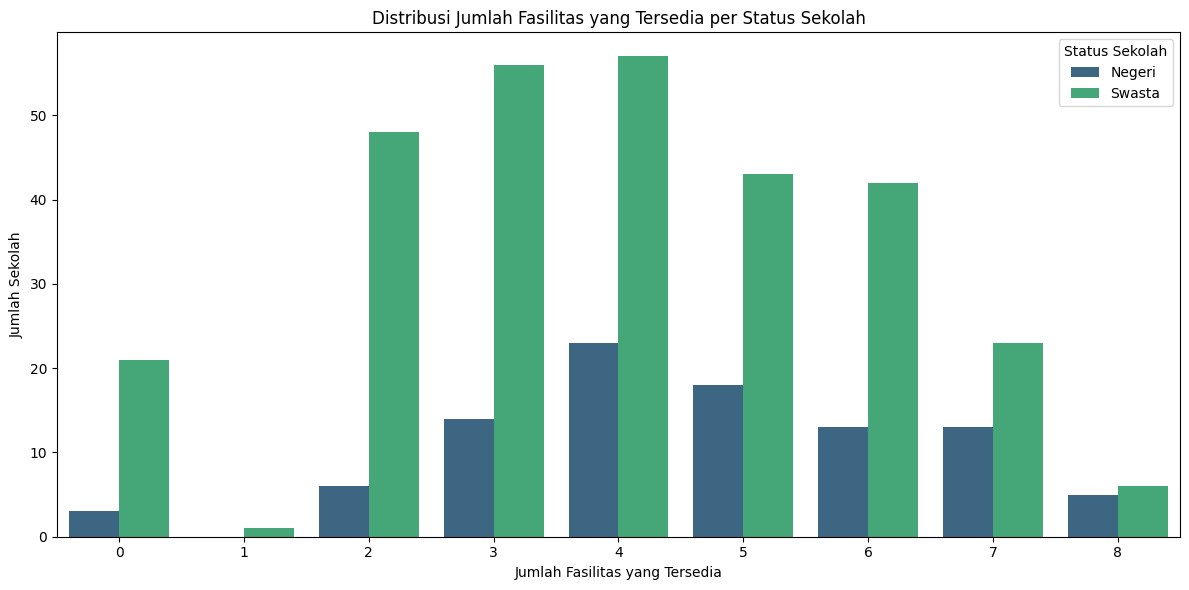

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
existing_facility_cols = [col for col in facility_cols_to_check if col in df.columns]

if existing_facility_cols:
    # Create a boolean mask where True means the facility is present (count > 0)
    facility_presence_mask = df[existing_facility_cols] > 0

    # Calculate the number of present facilities for each school
    df['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # --- Analysis and Display for Negeri Schools ---
    df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
    print("\n=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Negeri) ===")
    if not df_negeri.empty:
        facility_count_summary_negeri = df_negeri['present_facilities_count'].value_counts().sort_index().reset_index()
        facility_count_summary_negeri.columns = ['Jumlah Fasilitas Tersedia', 'Jumlah Sekolah']
        display(facility_count_summary_negeri)
    else:
        print("Tidak ada data untuk sekolah Negeri.")


    # --- Analysis and Display for Swasta Schools ---
    df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
    print("\n=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Sekolah Swasta) ===")
    if not df_swasta.empty:
        facility_count_summary_swasta = df_swasta['present_facilities_count'].value_counts().sort_index().reset_index()
        facility_count_summary_swasta.columns = ['Jumlah Fasilitas Tersedia', 'Jumlah Sekolah']
        display(facility_count_summary_swasta)
    else:
        print("Tidak ada data untuk sekolah Swasta.")

    # --- Visualization ---
    print("\n=== Visualisasi Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===")
    plt.figure(figsize=(12, 6))

    # Combine data for visualization
    combined_facility_counts = pd.concat([
        facility_count_summary_negeri.assign(Status='Negeri'),
        facility_count_summary_swasta.assign(Status='Swasta')
    ])

    sns.barplot(x='Jumlah Fasilitas Tersedia', y='Jumlah Sekolah', hue='Status', data=combined_facility_counts, palette='viridis')
    plt.title('Distribusi Jumlah Fasilitas yang Tersedia per Status Sekolah')
    plt.xlabel('Jumlah Fasilitas yang Tersedia')
    plt.ylabel('Jumlah Sekolah')
    plt.xticks(rotation=0)
    plt.legend(title='Status Sekolah')
    plt.tight_layout()
    plt.show()


else:
    print("No valid facility columns found to perform the check.")


=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===


present_facilities_count,0,1,2,3,4,5,6,7,8
status_sekolah,,,,,,,,,
Negeri,3,0,6,14,23,18,13,13,5
Swasta,21,1,48,56,57,43,42,23,6


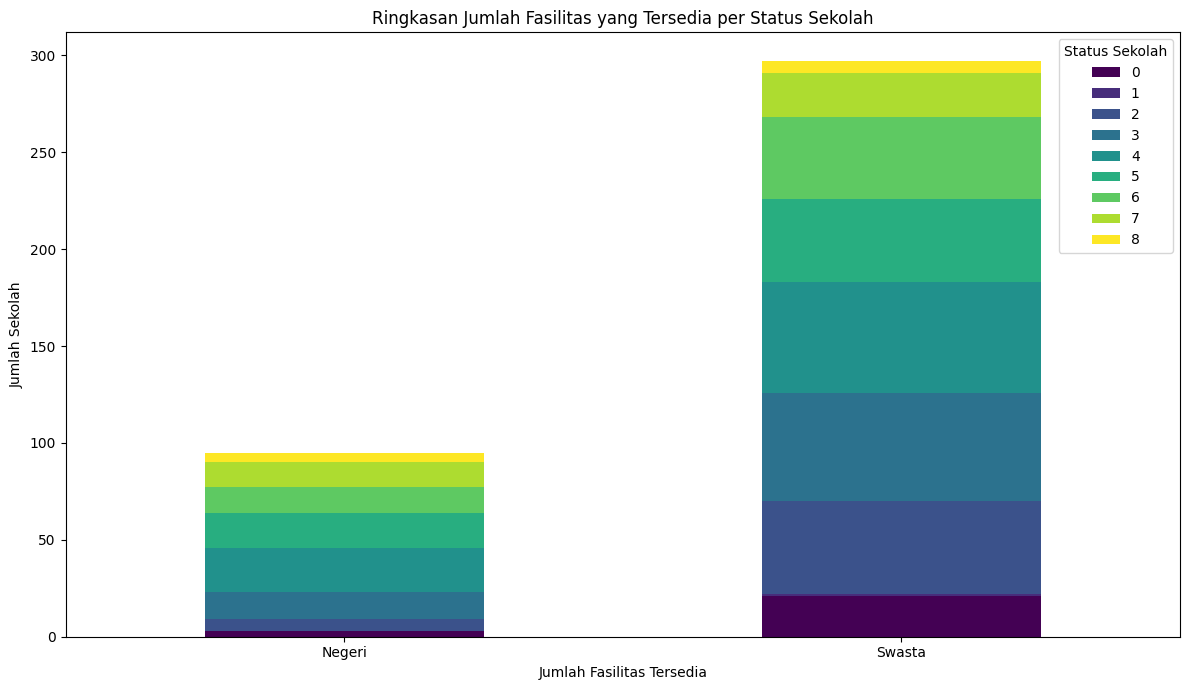

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for the 8 facilities to check (using 'after' counts)
facility_cols_to_check = [
    'after_ruang_kelas',
    'after_ruang_perpus',
    'after_ruang_lab',
    'after_ruang_tu',
    'after_ruang_uks',
    'after_ruang_ibadah',
    'after_tempat_bermain_olahraga',
    'after_toilet'
]

# Ensure all facility columns exist in the DataFrame before proceeding
facility_cols_to_check = [col for col in df.columns if col in facility_cols_to_check]

if facility_cols_to_check:
    # Create a boolean mask where True means the facility is present (count > 0) for all schools
    facility_presence_mask = df[facility_cols_to_check] > 0

    # Count the number of present facilities for each school
    df['present_facilities_count'] = facility_presence_mask.sum(axis=1)

    # Group by status_sekolah and the count of present facilities and summarize
    print("\n=== Ringkasan Jumlah Fasilitas yang Tersedia per Sekolah (Negeri vs Swasta) ===")
    facility_count_summary = df.groupby(['status_sekolah', 'present_facilities_count']).size().unstack(fill_value=0)

    display(facility_count_summary)

    # Visualize the summary using a grouped or stacked bar chart
    facility_count_summary.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title('Ringkasan Jumlah Fasilitas yang Tersedia per Status Sekolah')
    plt.xlabel('Jumlah Fasilitas Tersedia')
    plt.ylabel('Jumlah Sekolah')
    plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
    plt.legend(title='Status Sekolah')
    plt.tight_layout()
    plt.show()

else:
    print("No valid facility columns found to perform the check.")

## Clusterisasi belum fix

## Rasio Guru Siswa

In [ ]:
import numpy as np
import pandas as pd # Ensure pandas is imported


# 3. Rasio guru per siswa

# Calculate teacher-student ratio as students per teacher (pd / ptk)
df['teacher_student_ratio'] = df['pd'] / df['ptk']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
# Replace infinite values with NaN
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (using the recommended approach)
df['teacher_student_ratio'] = df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean())

# Define the target teacher-student ratio (students per teacher)
target_ratio = 8 # For 1:8 ratio, target is 8 students per teacher

# Create a new column to indicate the ratio's performance relative to the target
def evaluate_teacher_student_ratio(ratio, target):
    if pd.isna(ratio):
        return 'N/A'
    elif ratio < target:
        return f'Better than 1:{target} ({ratio:.2f})' # Fewer students per teacher is better
    elif ratio == target:
        return f'Meets 1:{target}'
    else:
        return f'Worse than 1:{target} ({ratio:.2f})' # More students per teacher is worse

df['Teacher_Student_Ratio_Evaluation'] = df['teacher_student_ratio'].apply(lambda x: evaluate_teacher_student_ratio(x, target_ratio))


# Group by sekolah and select the calculated ratio, then sort
teacher_student_ratio_sekolah_sorted = df.groupby('sekolah')[['ptk', 'pd', 'teacher_student_ratio', 'Teacher_Student_Ratio_Evaluation']].first().reset_index() # Using first() as no aggregation is requested
teacher_student_ratio_sekolah_sorted = teacher_student_ratio_sekolah_sorted.sort_values(by='teacher_student_ratio', ascending=False)

# Format the teacher_student_ratio as "1:X" where X is the calculated ratio
# Handle cases where ratio might be NaN after filling
teacher_student_ratio_sekolah_sorted['Teacher_Student_Ratio_Formatted'] = teacher_student_ratio_sekolah_sorted['teacher_student_ratio'].apply(lambda x: f'1:{x:.2f}' if pd.notna(x) else 'N/A')

# Display the table including the formatted ratio and evaluation
print("semakin tinggi nilai ratio, semakin jelek rationya, harusnya 1:8")

display(teacher_student_ratio_sekolah_sorted[['sekolah', 'ptk', 'pd', 'Teacher_Student_Ratio_Formatted', 'Teacher_Student_Ratio_Evaluation']])

semakin tinggi nilai ratio, semakin jelek rationya, harusnya 1:8


,sekolah,ptk,pd,Teacher_Student_Ratio_Formatted,Teacher_Student_Ratio_Evaluation
237,SLB PGRI AMONG PUTRA,3,88,1:29.33,Worse than 1:8 (29.33)
135,SLB HARAPAN PELANGI,2,51,1:25.50,Worse than 1:8 (25.50)
32,SLB AC JATI WIYATA DHARMA TUBAN,5,126,1:25.20,Worse than 1:8 (25.20)
360,SMALB PGRI GENTENG,1,22,1:22.00,Worse than 1:8 (22.00)
43,SLB AL FIRMA`UNAH,2,43,1:21.50,Worse than 1:8 (21.50)
...,...,...,...,...,...
357,SMALB BCG SUMBER DHARMA,2,0,1:0.00,Better than 1:8 (0.00)
285,SLB SINAR HARAPAN 1,20,0,1:0.00,Better than 1:8 (0.00)
106,SLB C DHARMA WANITA LEBO,5,0,1:0.00,Better than 1:8 (0.00)
64,SLB Amaryllis,7,0,1:0.00,Better than 1:8 (0.00)


## PROSES UNTUK MENDAPATKAN CLUSTER

### DENGAN MENGGUNAKAN

1. Ratio guru murid
2. Fasilitas Standar
3. Kecukupan ruang kelas



### RASIO GURU SISWA NEGERI VS SWASTA

In [ ]:
import numpy as np
import pandas as pd # Ensure pandas is imported


# 3. Rasio guru per siswa

# Calculate teacher-student ratio as students per teacher (pd / ptk)
df['teacher_student_ratio'] = df['pd'] / df['ptk']

# Handle potential NaN or infinite values in 'teacher_student_ratio'
# Replace infinite values with NaN
df['teacher_student_ratio'] = df['teacher_student_ratio'].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with the mean of the column (using the recommended approach)
df['teacher_student_ratio'] = df['teacher_student_ratio'].fillna(df['teacher_student_ratio'].mean())

# Add the new column with decimal format
df['Teacher_Student_Ratio_Final'] = df['teacher_student_ratio'].astype(float)


# Define the target teacher-student ratio (students per teacher)
target_ratio = 8 # For 1:8 ratio, target is 8 students per teacher

# Create a new column to indicate the ratio's performance relative to the target
def evaluate_teacher_student_ratio(ratio, target):
    if pd.isna(ratio):
        return 'N/A'
    elif ratio < target:
        return f'Better than 1:{target} ({ratio:.2f})' # Fewer students per teacher is better
    elif ratio == target:
        return f'Meets 1:{target}'
    else:
        return f'Worse than 1:{target} ({ratio:.2f})' # More students per teacher is worse

df['Teacher_Student_Ratio_Evaluation'] = df['teacher_student_ratio'].apply(lambda x: evaluate_teacher_student_ratio(x, target_ratio))


# Group by sekolah and select the calculated ratio, then sort
teacher_student_ratio_sekolah_sorted = df.groupby('sekolah')[['ptk', 'pd', 'teacher_student_ratio', 'Teacher_Student_Ratio_Evaluation', 'Teacher_Student_Ratio_Final']].first().reset_index() # Using first() as no aggregation is requested
teacher_student_ratio_sekolah_sorted = teacher_student_ratio_sekolah_sorted.sort_values(by='teacher_student_ratio', ascending=False)

# Format the teacher_student_ratio as "1:X" where X is the calculated ratio
# Handle cases where ratio might be NaN after filling
teacher_student_ratio_sekolah_sorted['Teacher_Student_Ratio_Formatted'] = teacher_student_ratio_sekolah_sorted['teacher_student_ratio'].apply(lambda x: f'1:{x:.2f}' if pd.notna(x) else 'N/A')

# Display the table including the formatted ratio and evaluation
print("semakin tinggi nilai ratio, semakin jelek rationya, idealnya 0.125")

display(teacher_student_ratio_sekolah_sorted[['sekolah', 'ptk', 'pd', 'Teacher_Student_Ratio_Final', 'Teacher_Student_Ratio_Formatted', 'Teacher_Student_Ratio_Evaluation']])

semakin tinggi nilai ratio, semakin jelek rationya, idealnya 0.125


,sekolah,ptk,pd,Teacher_Student_Ratio_Final,Teacher_Student_Ratio_Formatted,Teacher_Student_Ratio_Evaluation
237,SLB PGRI AMONG PUTRA,3,88,29.333333,1:29.33,Worse than 1:8 (29.33)
135,SLB HARAPAN PELANGI,2,51,25.500000,1:25.50,Worse than 1:8 (25.50)
32,SLB AC JATI WIYATA DHARMA TUBAN,5,126,25.200000,1:25.20,Worse than 1:8 (25.20)
360,SMALB PGRI GENTENG,1,22,22.000000,1:22.00,Worse than 1:8 (22.00)
43,SLB AL FIRMA`UNAH,2,43,21.500000,1:21.50,Worse than 1:8 (21.50)
...,...,...,...,...,...,...
357,SMALB BCG SUMBER DHARMA,2,0,0.000000,1:0.00,Better than 1:8 (0.00)
285,SLB SINAR HARAPAN 1,20,0,0.000000,1:0.00,Better than 1:8 (0.00)
106,SLB C DHARMA WANITA LEBO,5,0,0.000000,1:0.00,Better than 1:8 (0.00)
64,SLB Amaryllis,7,0,0.000000,1:0.00,Better than 1:8 (0.00)


### VISUALISASI DISTRIBUSI RASIO GURU PER SISWA NEGERI VS SWASTA


=== Distribusi Sekolah berdasarkan Evaluasi Rasio Guru per Siswa (terhadap 1:8) ===

--- Sekolah Negeri ---


,Evaluation Category,Count
0,Better than 1:8,75
1,Worse than 1:8,19
2,Meets 1:8,1


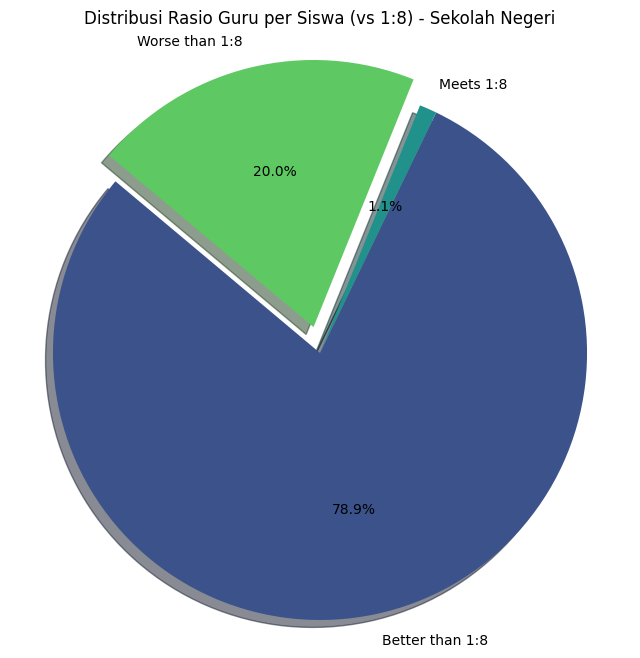


--- Sekolah Swasta ---


,Evaluation Category,Count
0,Better than 1:8,195
1,Worse than 1:8,93
2,Meets 1:8,9


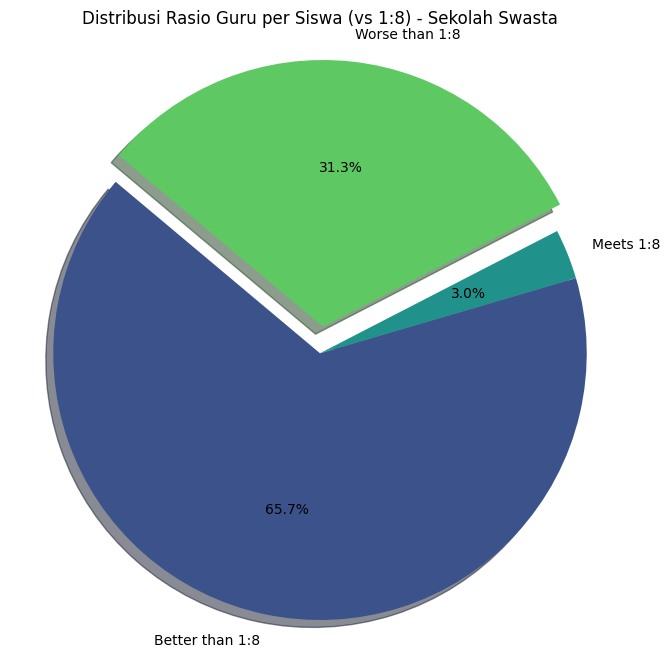

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the main evaluation category (e.g., "Better than 1:8")
df['Teacher_Student_Ratio_Category'] = df['Teacher_Student_Ratio_Evaluation'].apply(
    lambda x: x.split('(')[0].strip() if '(' in x else x
)

print("\n=== Distribusi Sekolah berdasarkan Evaluasi Rasio Guru per Siswa (terhadap 1:8) ===")

# --- Analisis dan Visualisasi untuk Sekolah Negeri ---
print("\n--- Sekolah Negeri ---")
df_negeri = df[df['status_sekolah'] == 'Negeri'].copy()
if not df_negeri.empty:
    ratio_evaluation_counts_negeri = df_negeri['Teacher_Student_Ratio_Category'].value_counts().reset_index()
    ratio_evaluation_counts_negeri.columns = ['Evaluation Category', 'Count']
    display(ratio_evaluation_counts_negeri)

    category_order = ['Better than 1:8', 'Meets 1:8', 'Worse than 1:8', 'N/A']
    ratio_evaluation_counts_negeri['Evaluation Category'] = pd.Categorical(ratio_evaluation_counts_negeri['Evaluation Category'], categories=category_order, ordered=True)
    ratio_evaluation_counts_negeri = ratio_evaluation_counts_negeri.sort_values('Evaluation Category')

    plt.figure(figsize=(8, 8)) # Increased figure size
    plt.pie(ratio_evaluation_counts_negeri['Count'],
            labels=ratio_evaluation_counts_negeri['Evaluation Category'],
            autopct='%1.1f%%', # Show percentages
            startangle=140,
            colors=sns.color_palette('viridis', len(ratio_evaluation_counts_negeri)),
            shadow=True, # Add shadow
            explode=[0.1 if cat == 'Worse than 1:8' else 0 for cat in ratio_evaluation_counts_negeri['Evaluation Category']] # Explode 'Worse than' slice
           )
    plt.title('Distribusi Rasio Guru per Siswa (vs 1:8) - Sekolah Negeri')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Tidak ada data untuk sekolah Negeri.")


# --- Analisis dan Visualisasi untuk Sekolah Swasta ---
print("\n--- Sekolah Swasta ---")
df_swasta = df[df['status_sekolah'] == 'Swasta'].copy()
if not df_swasta.empty:
    ratio_evaluation_counts_swasta = df_swasta['Teacher_Student_Ratio_Category'].value_counts().reset_index()
    ratio_evaluation_counts_swasta.columns = ['Evaluation Category', 'Count']
    display(ratio_evaluation_counts_swasta)

    category_order = ['Better than 1:8', 'Meets 1:8', 'Worse than 1:8', 'N/A']
    ratio_evaluation_counts_swasta['Evaluation Category'] = pd.Categorical(ratio_evaluation_counts_swasta['Evaluation Category'], categories=category_order, ordered=True)
    ratio_evaluation_counts_swasta = ratio_evaluation_counts_swasta.sort_values('Evaluation Category')

    plt.figure(figsize=(8, 8)) # Increased figure size
    plt.pie(ratio_evaluation_counts_swasta['Count'],
            labels=ratio_evaluation_counts_swasta['Evaluation Category'],
            autopct='%1.1f%%', # Show percentages
            startangle=140,
            colors=sns.color_palette('viridis', len(ratio_evaluation_counts_swasta)),
            shadow=True, # Add shadow
            explode=[0.1 if cat == 'Worse than 1:8' else 0 for cat in ratio_evaluation_counts_swasta['Evaluation Category']] # Explode 'Worse than' slice
           )
    plt.title('Distribusi Rasio Guru per Siswa (vs 1:8) - Sekolah Swasta')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Tidak ada data untuk sekolah Swasta.")

### PERHITUNGAN FASILITAS DASAR

In [ ]:
# Define the required facilities based on the regulation
required_facilities = [
    # 'after_ruang_kelas',  # a. ruang kelas - removed as requested
    'after_ruang_perpus', # b. ruang perpustakaan
    'after_ruang_lab',    # c. ruang laboratorium
    'after_ruang_praktik', # This might be considered part of 'ruang laboratorium' or a separate practical room
    'after_ruang_pimpinan', # d. ruang administrasi (ruang pimpinan and ruang tu)
    'after_ruang_tu',      # d. ruang administrasi (ruang pimpinan and ruang tu)
    'after_ruang_uks',    # e. ruang kesehatan (UKS)
    'after_ruang_ibadah', # f. tempat beribadah
    'after_tempat_bermain_olahraga', # g. tempat bermain atau berolahraga
    # 'kantin' - not available in the dataset
    'after_toilet'        # i. toilet
]

# Check if required facilities columns exist in the DataFrame
existing_required_facilities = [col for col in required_facilities if col in df.columns]
missing_required_facilities = [col for col in required_facilities if col not in df.columns]

if missing_required_facilities:
    print(f"Warning: Beberapa kolom fasilitas yang diwajibkan peraturan tidak ditemukan di DataFrame: {missing_required_facilities}. Analisis akan dilakukan hanya pada kolom yang tersedia.")

# Calculate the number of required facilities available for each school
df['available_required_facilities_count'] = df[existing_required_facilities].gt(0).sum(axis=1)

# Calculate the percentage of required facilities available
# Ensure the denominator is not zero if no existing_required_facilities are found
if len(existing_required_facilities) > 0:
    df['percentage_required_facilities'] = (df['available_required_facilities_count'] / len(existing_required_facilities)) * 100
else:
    df['percentage_required_facilities'] = 0

# Ensure the column is numeric and set display format to two decimal places
df['percentage_required_facilities'] = pd.to_numeric(df['percentage_required_facilities'], errors='coerce')


print("\n=== Ketersediaan Fasilitas Wajib per Sekolah (sample) ===")
display(df[['sekolah', 'status_sekolah', 'available_required_facilities_count', 'percentage_required_facilities']].head().style.format({'percentage_required_facilities': '{:.2f}%'}))


# --- Ringkasan Statistik per Status Sekolah ---
print("\n=== Ringkasan Statistik Ketersediaan Fasilitas Wajib per Status Sekolah ===")
facility_summary_by_status = df.groupby('status_sekolah')['percentage_required_facilities'].describe()
display(facility_summary_by_status.style.format('{:.2f}'))

# --- Sekolah dengan 100% Fasilitas Wajib ---
print("\n=== Sekolah dengan 100% Ketersediaan Fasilitas Wajib ===")
schools_with_100_facilities = df[df['percentage_required_facilities'] == 100]
print(f"Jumlah sekolah dengan 100% fasilitas wajib: {len(schools_with_100_facilities)}")
if not schools_with_100_facilities.empty:
    display(schools_with_100_facilities[['sekolah', 'status_sekolah']])

# --- Sekolah dengan 0% Fasilitas Wajib ---
print("\n=== Sekolah dengan 0% Ketersediaan Fasilitas Wajib ===")
schools_with_0_facilities = df[df['percentage_required_facilities'] == 0]
print(f"Jumlah sekolah dengan 0% fasilitas wajib: {len(schools_with_0_facilities)}")
if not schools_with_0_facilities.empty:
    display(schools_with_0_facilities[['sekolah', 'status_sekolah']])


=== Ketersediaan Fasilitas Wajib per Sekolah (sample) ===


,sekolah,status_sekolah,available_required_facilities_count,percentage_required_facilities
0,SLB SAMUDRA LAVENDER,Swasta,0,0.00%
1,SLB PGRI,Swasta,5,55.56%
2,SLB NEGERI KELEYAN BANGKALAN,Negeri,5,55.56%
3,SLB SAMUDRA TERRA ATHENA,Swasta,3,33.33%
4,SLB PGRI BANGOREJO,Swasta,5,55.56%



=== Ringkasan Statistik Ketersediaan Fasilitas Wajib per Status Sekolah ===


,count,mean,std,min,25%,50%,75%,max
status_sekolah,,,,,,,,
Negeri,95.00,52.28,22.68,0.00,33.33,55.56,66.67,100.00
Swasta,297.00,42.31,23.69,0.00,22.22,44.44,55.56,100.00



=== Sekolah dengan 100% Ketersediaan Fasilitas Wajib ===
Jumlah sekolah dengan 100% fasilitas wajib: 5


,sekolah,status_sekolah
12,SLB PGRI 3 CLURING,Negeri
176,SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG,Negeri
254,SLB NEGERI GEDANGAN,Negeri
339,SLB BHAKTI LUHUR,Swasta
376,SLB C AKW KUMARA I SURABAYA,Swasta



=== Sekolah dengan 0% Ketersediaan Fasilitas Wajib ===
Jumlah sekolah dengan 0% fasilitas wajib: 25


,sekolah,status_sekolah
0,SLB SAMUDRA LAVENDER,Swasta
9,SMPLB PGRI BANYUWANGI,Swasta
20,SLB PGRI GENTENG,Swasta
21,SMALB PGRI GENTENG,Swasta
22,SMPLB PGRI GENTENG,Swasta
25,TKLB BHAKTI PERTIWI,Swasta
62,SLB NEGERI TAMBAHREJO BOJONEGORO,Negeri
79,SLB AL-IKHLAS GRESIK,Swasta
84,SLB ABC BALUNG,Swasta
115,SLB BUDI MULYA KANDAT,Negeri


### VISUALISASI PERHITUNGAN FASILITAS DASAR NEGERI VS SWASTA


=== Distribusi Persentase Ketersediaan Fasilitas Wajib (Sekolah Negeri vs Swasta) ===


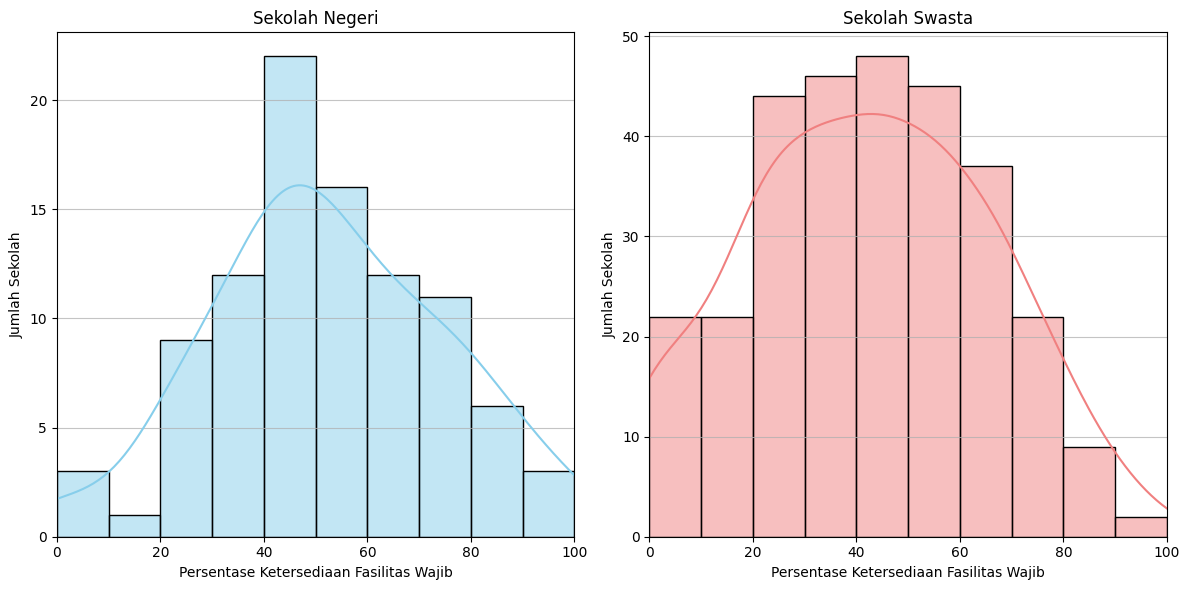

In [ ]:
# --- Visualisasi per Status Sekolah ---

print("\n=== Distribusi Persentase Ketersediaan Fasilitas Wajib (Sekolah Negeri vs Swasta) ===")

plt.figure(figsize=(12, 6))

# Visualisasi untuk Sekolah Negeri
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df[df['status_sekolah'] == 'Negeri']['percentage_required_facilities'], kde=True, bins=10, color='skyblue')
plt.title('Sekolah Negeri')
plt.xlabel('Persentase Ketersediaan Fasilitas Wajib')
plt.ylabel('Jumlah Sekolah')
plt.xlim(0, 100)
plt.grid(axis='y', alpha=0.75)

# Visualisasi untuk Sekolah Swasta
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df[df['status_sekolah'] == 'Swasta']['percentage_required_facilities'], kde=True, bins=10, color='lightcoral')
plt.title('Sekolah Swasta')
plt.xlabel('Persentase Ketersediaan Fasilitas Wajib')
plt.ylabel('Jumlah Sekolah')
plt.xlim(0, 100)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### KECUKUPAN RUANG KELAS

In [ ]:
# Calculate classroom sufficiency for all schools (if not already calculated)
if 'classroom_sufficiency' not in df.columns:
    df['required_classrooms'] = df['pd'] / 8
    df['classroom_sufficiency'] = df['after_ruang_kelas'] - df['required_classrooms']

# Group by sekolah and display the classroom sufficiency for each school
classroom_sufficiency_by_sekolah = df.groupby('sekolah')[['required_classrooms', 'after_ruang_kelas', 'classroom_sufficiency']].first().reset_index()

print("\n=== Kecukupan Ruang Kelas per Sekolah ===")
print("\n pada sekoah PK-LK shafa membutuhkan 4.875 ruang kelas, akan tetapi raung kelas yang tersdia 3. maka classroom -1.875 karna minus dari yang diharapkan ")
display(classroom_sufficiency_by_sekolah)


=== Kecukupan Ruang Kelas per Sekolah ===

 pada sekoah PK-LK shafa membutuhkan 4.875 ruang kelas, akan tetapi raung kelas yang tersdia 3. maka classroom -1.875 karna minus dari yang diharapkan 


,sekolah,required_classrooms,after_ruang_kelas,classroom_sufficiency
0,PK-LK SHAFA,4.875,3,-1.875
1,SDLB ABCD PGRI 2 JAJAG,6.625,2,-4.625
2,SDLB ABCD PGRI 3 CLURING,0.125,6,5.875
3,SDLB ABCD PGRI KALIPURO,2.500,3,0.500
4,SDLB ADELWIS,1.500,3,1.500
...,...,...,...,...
378,SMPLB YPABK MUNCAR,2.250,3,0.750
379,SMPLB-A YPAB SURABAYA,1.875,7,5.125
380,SMPLB-BCD YPAC JEMBER,3.125,11,7.875
381,TKLB BHAKTI PERTIWI,0.000,0,0.000


### PERANKINGAN SEKOLAH  Berdasarkan Gabungan Fitur (Rasio Guru-Siswa (inverted), Fasilitas, Kecukupan Ruang Kelas)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the features for combined scoring
features_for_scoring = [
    'teacher_student_ratio',
    'percentage_required_facilities',
    'classroom_sufficiency'
]

# Handle potential missing values in the selected features before scaling
df_scoring = df[features_for_scoring].copy()
# Fill NaN values with the mean of each column (or another appropriate method)
df_scoring = df_scoring.fillna(df_scoring.mean())

# Standardize the features for a comparable scale
scaler = StandardScaler()
scaled_features_scoring = scaler.fit_transform(df_scoring)

# Create a DataFrame of scaled features, indexed by the original DataFrame index
scaled_df_scoring = pd.DataFrame(scaled_features_scoring, columns=features_for_scoring, index=df_scoring.index)

# Calculate a combined score for each school by averaging the standardized features
# Lower teacher_student_ratio is better (negative standardized value)
# Higher percentage_required_facilities is better (positive standardized value)
# Higher classroom_sufficiency is better (positive standardized value)
# To make the combined score intuitive (higher is better), we can potentially reverse the sign of the standardized teacher_student_ratio
scaled_df_scoring['combined_score'] = (-scaled_df_scoring['teacher_student_ratio'] + scaled_df_scoring['percentage_required_facilities'] + scaled_df_scoring['classroom_sufficiency']) / 3 # Averaging the (potentially inverted) standardized scores

# Add the combined score to the original DataFrame
df['combined_score'] = scaled_df_scoring['combined_score']

# Group by school and get the first entry (assuming one row per school in practice for these features)
school_ranking = df.groupby('sekolah')[['teacher_student_ratio', 'percentage_required_facilities', 'classroom_sufficiency', 'combined_score']].first().reset_index()

# Rank the schools based on the combined score (higher score is better)
school_ranking = school_ranking.sort_values(by='combined_score', ascending=False)

print("\n=== Ranking Sekolah Berdasarkan Gabungan Fitur (Rasio Guru-Siswa (inverted), Fasilitas, Kecukupan Ruang Kelas) ===")
print("Skor Gabungan dihitung dari rata-rata fitur yang sudah distandardisasi. Skor lebih tinggi = kinerja/ketersediaan lebih baik secara keseluruhan.")
display(school_ranking)


=== Ranking Sekolah Berdasarkan Gabungan Fitur (Rasio Guru-Siswa (inverted), Fasilitas, Kecukupan Ruang Kelas) ===
Skor Gabungan dihitung dari rata-rata fitur yang sudah distandardisasi. Skor lebih tinggi = kinerja/ketersediaan lebih baik secara keseluruhan.


,sekolah,teacher_student_ratio,percentage_required_facilities,classroom_sufficiency,combined_score
66,SLB B-C Dharma Wanita,3.750000,66.666667,37.250,2.508140
319,SLB YPAC SURABAYA,3.700000,77.777778,33.750,2.480378
190,SLB NEGERI BRANJANGAN,3.731707,44.444444,40.875,2.393089
21,SLB - AC DHARMA WANITA,4.000000,77.777778,30.500,2.278479
152,SLB KHUSUS BINA MANDIRI,2.571429,66.666667,22.750,1.836261
...,...,...,...,...,...
43,SLB AL FIRMA`UNAH,21.500000,22.222222,-2.375,-1.858011
135,SLB HARAPAN PELANGI,25.500000,44.444444,-2.375,-1.910297
360,SMALB PGRI GENTENG,22.000000,0.000000,-2.750,-2.235110
32,SLB AC JATI WIYATA DHARMA TUBAN,25.200000,22.222222,-8.750,-2.537012


### CLUSTERISASI DARI PENGGABUNGAN 3 FITUR


=== Distribusi Sekolah per Cluster ===


,count
cluster,
0,68
1,156
2,168



=== Fitur Clustering dan Penugasan Cluster per Sekolah (Sample) ===


,sekolah,teacher_student_ratio,percentage_required_facilities,classroom_sufficiency,cluster
0,SLB SAMUDRA LAVENDER,6.600000,0.000000,-12.375,1
1,SLB PGRI,7.200000,55.555556,2.500,2
2,SLB NEGERI KELEYAN BANGKALAN,2.631579,55.555556,-0.250,2
3,SLB SAMUDRA TERRA ATHENA,3.200000,33.333333,1.000,1
4,SLB PGRI BANGOREJO,6.000000,55.555556,4.000,2



=== Visualisasi Distribusi Skor Gabungan per Cluster (Negeri vs Swasta) ===


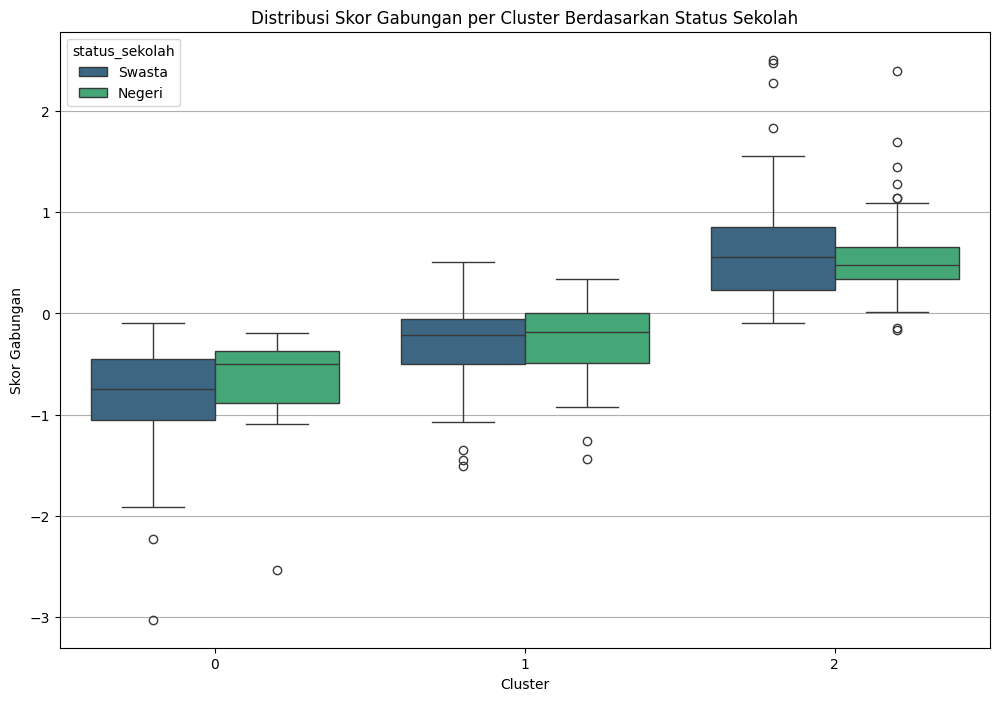


=== Pusat Cluster (Scaled Features Digunakan untuk Clustering) ===


,teacher_student_ratio,percentage_required_facilities,classroom_sufficiency
0,1.569068,-0.451655,-0.463621
1,-0.298476,-0.736708,-0.383864
2,-0.357943,0.866898,0.544102



=== Ringkasan Statistik Fitur per Cluster ===


teacher_student_ratio                                                  \
                        count       mean       std       min   25%        50%   
cluster                                                                         
0                        68.0  12.603116  4.204185  8.916667  10.0  11.133929   
1                       156.0   5.757886  2.058381  0.000000   4.4   6.122222   
2                       168.0   5.539916  2.047975  0.250000   4.0   5.183333   

                              percentage_required_facilities             ...  \
               75%        max                          count       mean  ...   
cluster                                                                  ...   
0        13.137500  29.333333                           68.0  33.986928  ...   
1         7.250000   9.375000                          156.0  27.207977  ...   
2         7.028409  12.000000                          168.0  65.343915  ...   

                               classroom_sufficiency                      \
               75%         max                 count      mean       std   
cluster                                                                    
0        44.444444  100.000000                  68.0 -1.334559  3.943363   
1        44.444444   55.555556                 156.0 -0.839744  4.027046   
2        77.777778  100.000000                 168.0  4.917411  6.994863   

                                                 
            min    25%     50%      75%     max  
cluster                                          
0        -9.625 -4.000 -2.0625  1.25000   7.750  
1       -17.125 -3.250 -0.3125  1.53125  12.375  
2        -4.125  1.375  3.6875  6.37500  40.875  

[3 rows x 24 columns]


=== Ringkasan Statistik Skor Gabungan per Cluster ===


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,68.0,-0.828115,0.575540,-3.028347,-1.036728,-0.727365,-0.438519,-0.090803
1,156.0,-0.274032,0.368417,-1.509562,-0.494128,-0.200446,-0.031464,0.507766
2,168.0,0.589648,0.470839,-0.163920,0.271913,0.497999,0.804414,2.508140



=== Ringkasan Statistik Skor Gabungan per Status Sekolah ===


,count,mean,std,min,25%,50%,75%,max
status_sekolah,,,,,,,,
Negeri,95.0,0.130873,0.671746,-2.537012,-0.198072,0.178870,0.485291,2.393089
Swasta,297.0,-0.041862,0.717653,-3.028347,-0.493593,-0.064873,0.385819,2.508140


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for clustering
features_for_clustering = [
    'teacher_student_ratio',
    'percentage_required_facilities',
    'classroom_sufficiency'
]

# Handle potential missing values in the selected features before scaling
df_clustering = df[features_for_clustering].copy()
# Fill NaN values with the mean of each column
df_clustering = df_clustering.fillna(df_clustering.mean())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

# Determine the optimal number of clusters (using the Elbow method as an example)
# WCSS = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
#     kmeans.fit(scaled_features)
#     WCSS.append(kmeans.inertia_)

# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), WCSS, marker='o', linestyle='--')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# Based on the elbow method (assuming we choose 3 clusters as an example, you can adjust this)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

print("\n=== Distribusi Sekolah per Cluster ===")
cluster_distribution = df['cluster'].value_counts().sort_index()
display(cluster_distribution)

# Display table with selected features and cluster assignment
print("\n=== Fitur Clustering dan Penugasan Cluster per Sekolah (Sample) ===")
display(df[['sekolah'] + features_for_clustering + ['cluster']].head())


# --- Visualisasi Hasil Clustering using Combined Score in a Single Plot ---
print("\n=== Visualisasi Distribusi Skor Gabungan per Cluster (Negeri vs Swasta) ===")

# Use the original dataframe with the added cluster and combined_score columns for visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cluster', y='combined_score', hue='status_sekolah', palette='viridis')
plt.title('Distribusi Skor Gabungan per Cluster Berdasarkan Status Sekolah')
plt.xlabel('Cluster')
plt.ylabel('Skor Gabungan')
plt.grid(axis='y')
plt.show()

# Optional: Display cluster centers for interpretation (still relevant for the features used for clustering)
print("\n=== Pusat Cluster (Scaled Features Digunakan untuk Clustering) ===")
display(pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering))

print("\n=== Ringkasan Statistik Fitur per Cluster ===")
display(df.groupby('cluster')[features_for_clustering].describe())

print("\n=== Ringkasan Statistik Skor Gabungan per Cluster ===")
display(df.groupby('cluster')['combined_score'].describe())

print("\n=== Ringkasan Statistik Skor Gabungan per Status Sekolah ===")
display(df.groupby('status_sekolah')['combined_score'].describe())